In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

import matplotlib.pyplot as plt

from cosmos import Simulator, ModelAnalyzer

In [ ]:
SAVE_ROOT = "../test/sim"

In [4]:
name = "default"
save_dir = os.path.join(SAVE_ROOT, name)
os.makedirs(save_dir, exist_ok=True)

simulator = Simulator()  # Initialize the simulator with the default configuration
simulator.simulate()
simulator.build_cosmos(os.path.join(save_dir, "model"))

/Users/mswang/Desktop/cosmos/src/cosmos/dms_data/dms_data.py:111: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_res = pd.concat([df_include_all, df_exclude_all], axis=0)


There are a few plotting functions defined on the `simulator` object to see the distribution of parameters.

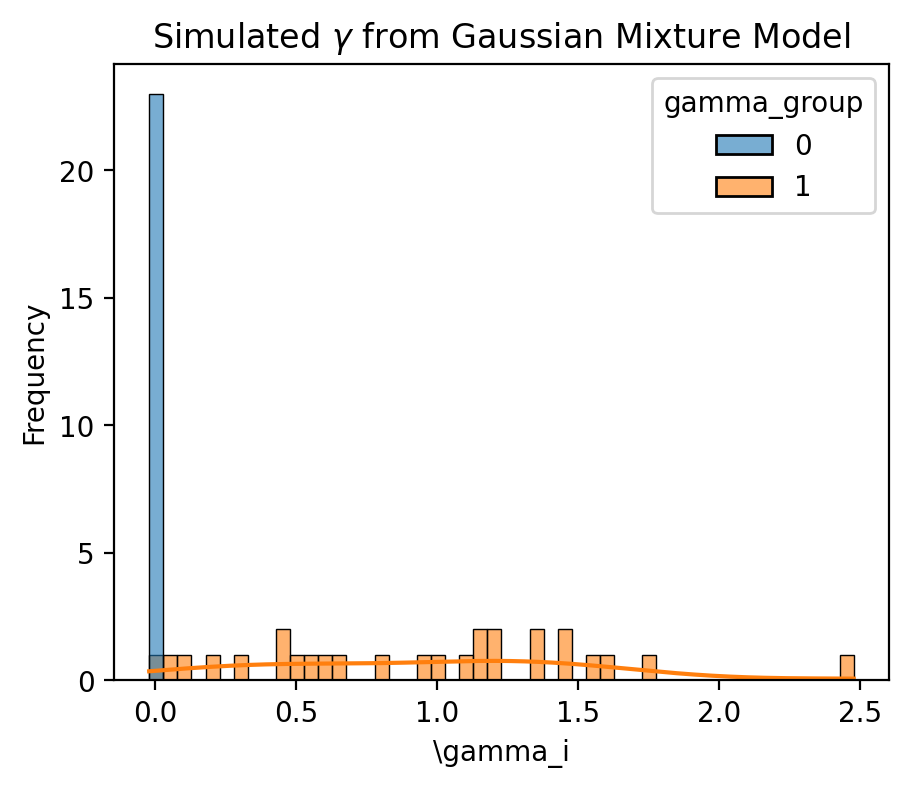

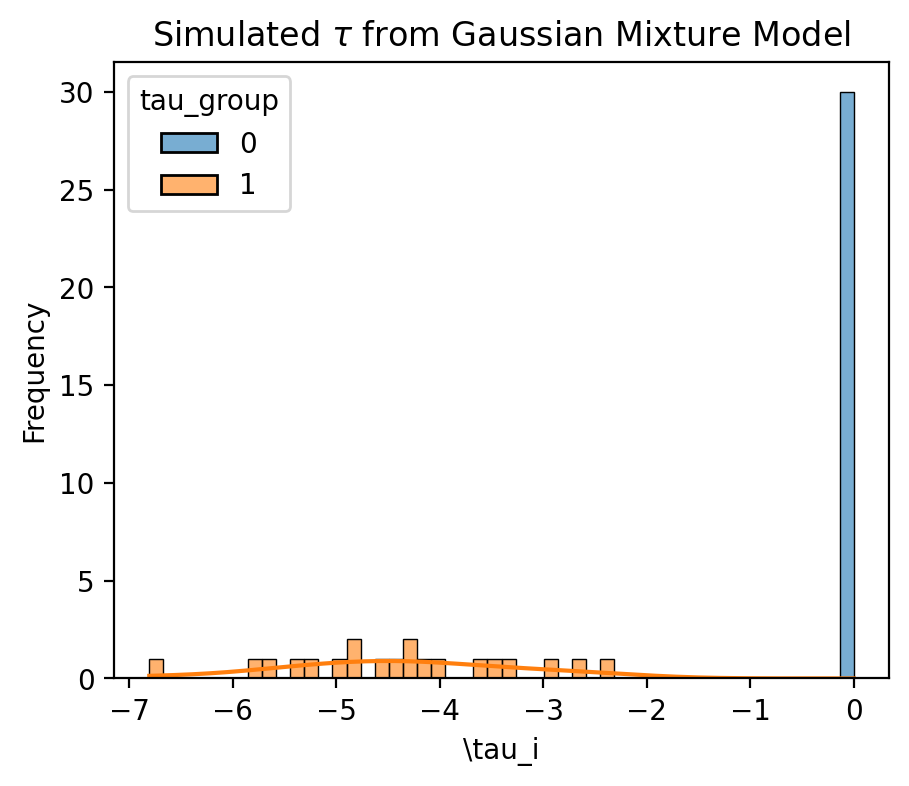

In [5]:
# Position-specific parameters
_ = simulator.plot_gamma()
_ = plt.show()
_ = simulator.plot_tau()
_ = plt.show()

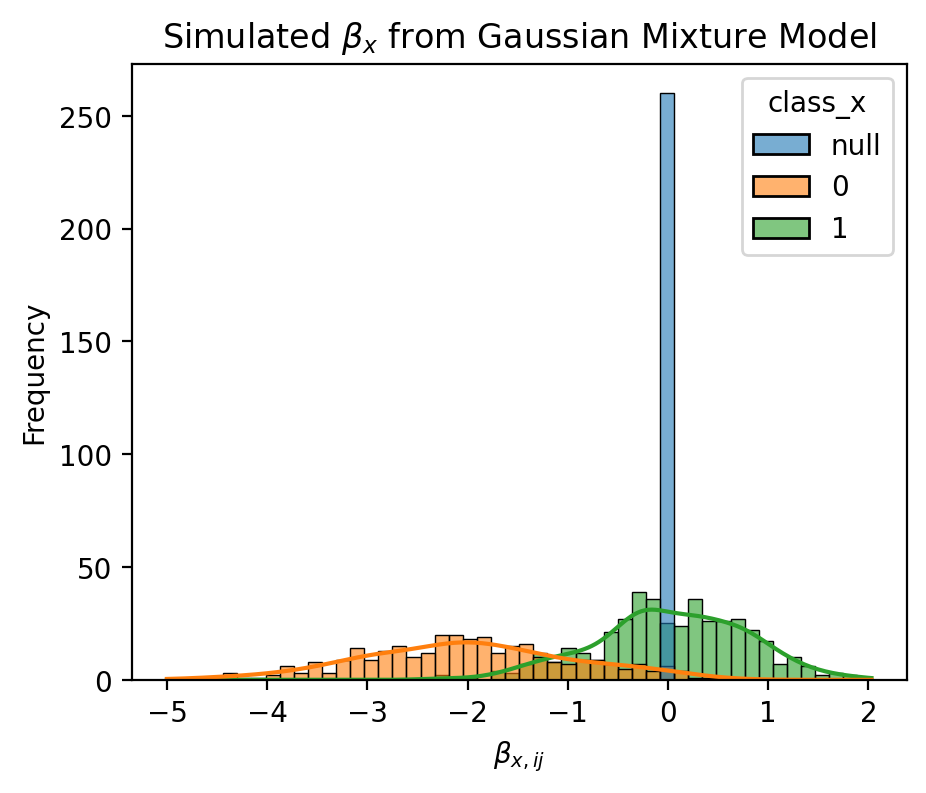

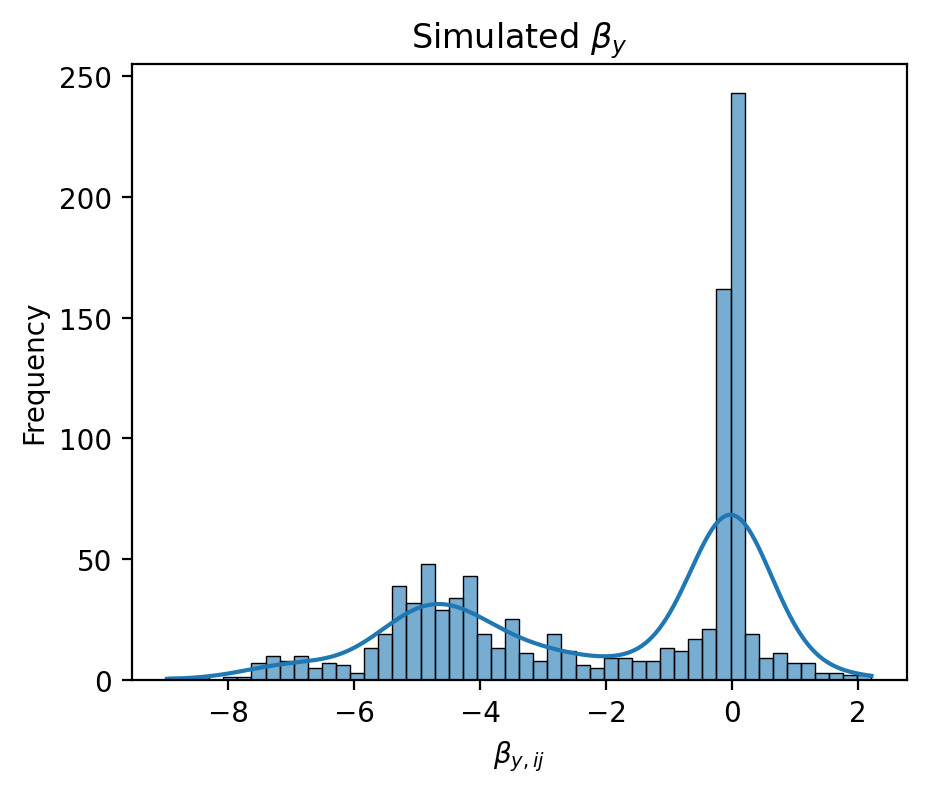

In [6]:
# Simulated "true" beta
_ = simulator.plot_beta_x()
_ = plt.show()

_ = simulator.plot_beta_y()
_ = plt.show()

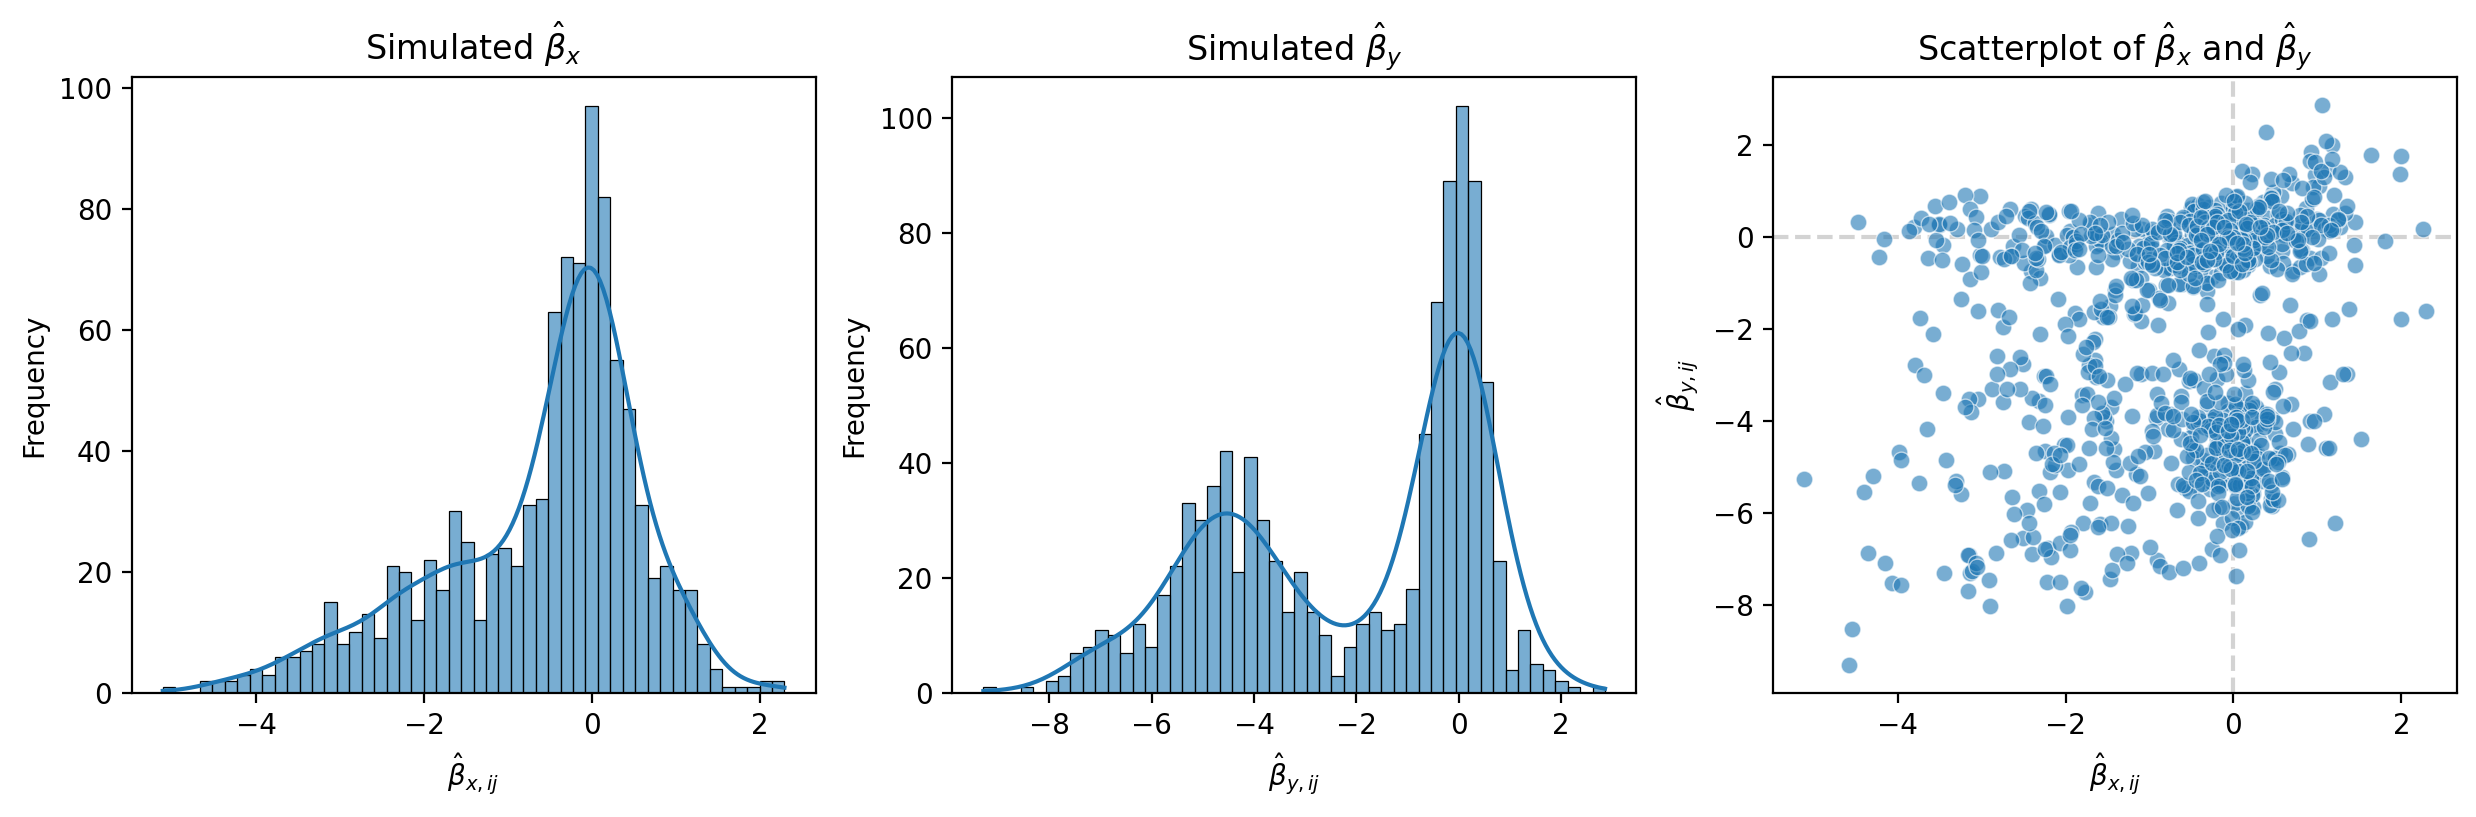

In [7]:
# Simulated observed values
_ = simulator.plot_beta_x_y_hat()
_ = plt.show()

We can run `Cosmos` on simulated data to see its performance (i.e. if it categorizes models correctly).

In [8]:
# 100 groups takes ~1h on a M1 MacBook Pro
for i in simulator.model.all_group_new_index:
    print(f"Running Cosmos on combined group {i}...", end="\r")
    simulator.model.run_cosmos(group_new_idx=i, no_s_hat=False)

In [9]:
analyzer = ModelAnalyzer(
    model=simulator.model,
    data_path=os.path.join(save_dir, "data"),
)

In [10]:
df_best_models = analyzer.best_models
df_position = simulator.df_position

In [11]:
true_models = df_position.set_index("position")["model"]
selected_models = df_best_models.set_index("position")["model_rank1"]

In [12]:
accuracy = (true_models == selected_models).mean()
print(f"Model selection accuracy: {accuracy:.2%}")

Model selection accuracy: 94.00%
